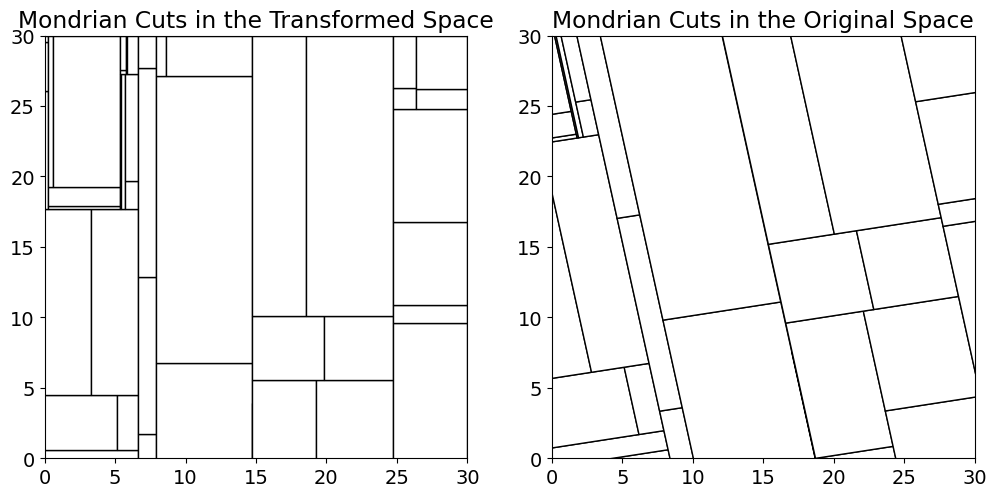

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# increase the font size 
plt.rcParams.update({'font.size': 14})

# Function to split rectangles
def split_rect(ax, x, y, width, height, depth, time = 100):
    if time <= 0:
        return
    if depth == 0:
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor='white')
        ax.add_patch(rect)
    else:
        threshold = width / (width + height)
        if np.random.uniform() < threshold:
            time -= np.random.exponential(width)
            split = np.random.uniform() * width
            split_rect(ax, x, y, split, height, depth - 1, time)
            split_rect(ax, x + split, y, width - split, height, depth - 1, time)
        else:
            time -= np.random.exponential(height)
            split = np.random.uniform() * height
            split_rect(ax, x, y, width, split, depth - 1, time)
            split_rect(ax, x, y + split, width, height - split, depth - 1, time)

# Function to draw original and transformed patterns side by side
def draw_and_transform(width, height, depth, transform_matrix):
    # Draw original pattern
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.set_aspect('equal')
    #ax1.axis('off')
    split_rect(ax1, -5, -5, width, height, depth)
    ax1.set_xlim(0, 30)
    ax1.set_ylim(0, 30)
    ax1.set_title('Mondrian Cuts in the Transformed Space')
    
    # Apply transformation and draw transformed pattern
    for rect in ax1.patches:
        x, y = rect.get_xy()
        w, h = rect.get_width(), rect.get_height()
        vertices = np.array([
            [x, y],
            [x + w, y],
            [x + w, y + h],
            [x, y + h]
        ])
        transformed_vertices = np.dot(vertices, transform_matrix)
        transformed_patch = patches.Polygon(transformed_vertices, linewidth=1, edgecolor='black', facecolor='white')
        ax2.add_patch(transformed_patch)
        
    center = np.array([width / 2, height / 2])
    ax2.set_xlim(0, 30)
    ax2.set_ylim(0, 30)
    ax2.set_aspect('equal')
    #ax2.axis('off')
    ax2.set_title('Mondrian Cuts in the Original Space')
    
    plt.show()

# Transformation matrix, rotate by 10 degrees and scales the x-axis by 0.9 and y-axis by 0.8
angle = np.radians(10)
rotation_matrix = np.array([
    [np.cos(angle) * 0.8, -np.sin(angle) * 0.7],
    [np.sin(angle), np.cos(angle) * 0.8]
])

rotation_matrix_inv = np.linalg.inv(rotation_matrix)
rotation_matrix_inv

draw_and_transform(35, 35, 6, rotation_matrix_inv)


In [4]:
rotation_matrix

array([[ 0.7878462 , -0.12155372],
       [ 0.17364818,  0.7878462 ]])

In [5]:
rotation_matrix_inv

array([[ 1.22753955,  0.1893923 ],
       [-0.27056043,  1.22753955]])